In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os 

In [38]:
filename = os.path.join(os.getcwd(), '../data', "listings.csv")
data = pd.read_csv(filename)
data.shape

C:\Users\Hafsa\AppData\Local\Temp\ipykernel_16628\2078968490.py:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)


(42931, 75)

In [39]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,801749842377802394,https://www.airbnb.com/rooms/801749842377802394,20230306014634,2023-03-06,city scrape,A home away from home,The whole group will be comfortable in this sp...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495455523,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,765948794133787266,https://www.airbnb.com/rooms/765948794133787266,20230306014634,2023-03-06,city scrape,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,488760226,...,4.92,4.85,4.92,NaN,t,2,1,1,0,4.29
2,636274456676328779,https://www.airbnb.com/rooms/636274456676328779,20230306014634,2023-03-06,city scrape,Villa Masino.,Close to beach Peaceful walk to park & beach...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,461263600,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,768125251187660469,https://www.airbnb.com/rooms/768125251187660469,20230306014634,2023-03-06,city scrape,1-Bedroom Private Room with King Size Bed,Private room with king size bedroom near Sheep...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,475699129,...,5.00,5.00,5.00,NaN,t,7,0,7,0,5.17
4,49248255,https://www.airbnb.com/rooms/49248255,20230306014634,2023-03-06,city scrape,Get the best of both worlds in Riverdale!,Welcome to the greatest location if you desire...,You will find within walking distance the Metr...,https://a0.muscache.com/pictures/e8e13cf7-44e9...,397288055,...,4.88,4.72,4.64,NaN,f,1,1,0,0,1.11


#### Get column names

In [40]:
list(data.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

#### Remove column names that includes 'url'

In [41]:
data.drop(list(data.filter(regex = 'url' )), axis=1, inplace=True)

data.shape

(42931, 70)

#### Summary Statistics of the DataFrame

In [42]:
data.describe(include='all')

,id,scrape_id,last_scraped,source,name,description,neighborhood_overview,host_id,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.293100e+04,4.293100e+04,42931,42931,42919,42178,24870,4.293100e+04,42926,42926,...,32197.000000,32185.000000,32185.000000,1,42931,42931.000000,42931.000000,42931.000000,42931.000000,32627.000000
unique,NaN,NaN,2,2,41408,38021,19578,NaN,9831,4747,...,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2023-03-06,city scrape,Water View King Bed Hotel Room,Relax with the whole family at this peaceful p...,Flatiron District<br />The triangular shape of...,NaN,Blueground,2016-12-16,...,NaN,NaN,NaN,41662/AL,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,29993,28286,30,79,79,NaN,526,533,...,NaN,NaN,NaN,1,33908,NaN,NaN,NaN,NaN,NaN
mean,2.222772e+17,2.023031e+13,NaN,NaN,NaN,NaN,NaN,1.516012e+08,NaN,NaN,...,4.812636,4.732682,4.641796,NaN,NaN,24.054809,12.950665,10.977802,0.060912,1.168988
std,3.344213e+17,0.000000e+00,NaN,NaN,NaN,NaN,NaN,1.621301e+08,NaN,NaN,...,0.435695,0.415671,0.498810,NaN,NaN,80.867958,63.277587,47.202309,0.598385,1.789675
min,2.595000e+03,2.023031e+13,NaN,NaN,NaN,NaN,NaN,1.678000e+03,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.940474e+07,2.023031e+13,NaN,NaN,NaN,NaN,NaN,1.608533e+07,NaN,NaN,...,4.800000,4.640000,4.530000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.140000
50%,4.337482e+07,2.023031e+13,NaN,NaN,NaN,NaN,NaN,7.433812e+07,NaN,NaN,...,4.960000,4.850000,4.770000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.520000
75%,6.305016e+17,2.023031e+13,NaN,NaN,NaN,NaN,NaN,2.680692e+08,NaN,NaN,...,5.000000,5.000000,4.960000,NaN,NaN,4.000000,1.000000,2.000000,0.000000,1.670000


### Question 1:
    What is the avg availability for the listings in each of the 5 boroughs of NYC (out of 365)?

In [43]:
#get all the boroughs
boroughs = list(data['neighbourhood_group_cleansed'].unique())
boroughs

['Brooklyn', 'Staten Island', 'Bronx', 'Queens', 'Manhattan']

##### Filter out data entries respective of their borough

In [44]:
brooklyn = data[data['neighbourhood_group_cleansed'] == "Brooklyn"]
queens = data[data['neighbourhood_group_cleansed'] == "Queens"] 
staten_island = data[data['neighbourhood_group_cleansed'] == "Staten Island"] 
bronx = data[data['neighbourhood_group_cleansed'] == "Bronx"]
manhattan = data[data['neighbourhood_group_cleansed'] == "Manhattan"]


##### Find the avg availability of each borough

In [45]:
avg_avail = {
    'Boroughs': boroughs,
    'Avg Availability': list([
        np.round(np.mean(brooklyn['availability_365']),2),
        np.round(np.mean(staten_island['availability_365']),2),
        np.round(np.mean(bronx['availability_365']),2),
        np.round(np.mean(queens['availability_365']),2),
        np.round(np.mean(manhattan['availability_365']),2)
    ])
}
avg_avail

{'Boroughs': ['Brooklyn', 'Staten Island', 'Bronx', 'Queens', 'Manhattan'],
 'Avg Availability': [125.58, 210.42, 208.95, 172.61, 132.81]}

##### Avg availability df in descending order

In [46]:
avg_avail_df = pd.DataFrame(avg_avail)
avg_avail_df = avg_avail_df.sort_values(by=['Avg Availability'], ascending=False)

avg_avail_df

,Boroughs,Avg Availability
1,Staten Island,210.42
2,Bronx,208.95
3,Queens,172.61
4,Manhattan,132.81
0,Brooklyn,125.58


##### Bar graph to visualize data

<BarContainer object of 5 artists>

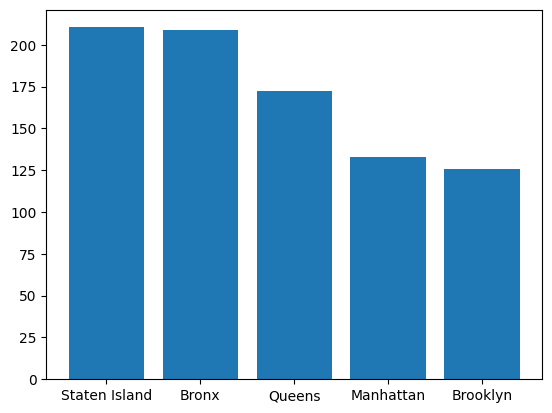

In [49]:
plt.bar(avg_avail_df['Boroughs'], avg_avail_df['Avg Availability'])

### Conclusion
    Listings in Staten Island has the highest avg availability out of 365 days. Thus, it is the least popular borough. In contrast, listings in Brooklyn have the least number of avg availability out of 365 days. Hence, it is the most popular borough. 